<a href="https://colab.research.google.com/github/nguyetvo/Nguyet-ML2-Online-042020/blob/master/Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML2 - Advances - Week \#2

## Outline:
1. Data Collection
2. Google Landmark Recognition Challenge
3. Introduction to Inception
4. Train a model with Inception
5. Squeeze-and-Excitation Networks

## 1.  Data Collection for Machine Learning

- Deep learning, on the other hand, can automatically generate features, but instead requires larger amounts of training data to perform well 
- Data collection largely consists of data acquisition, data labeling, and improvement of existing data

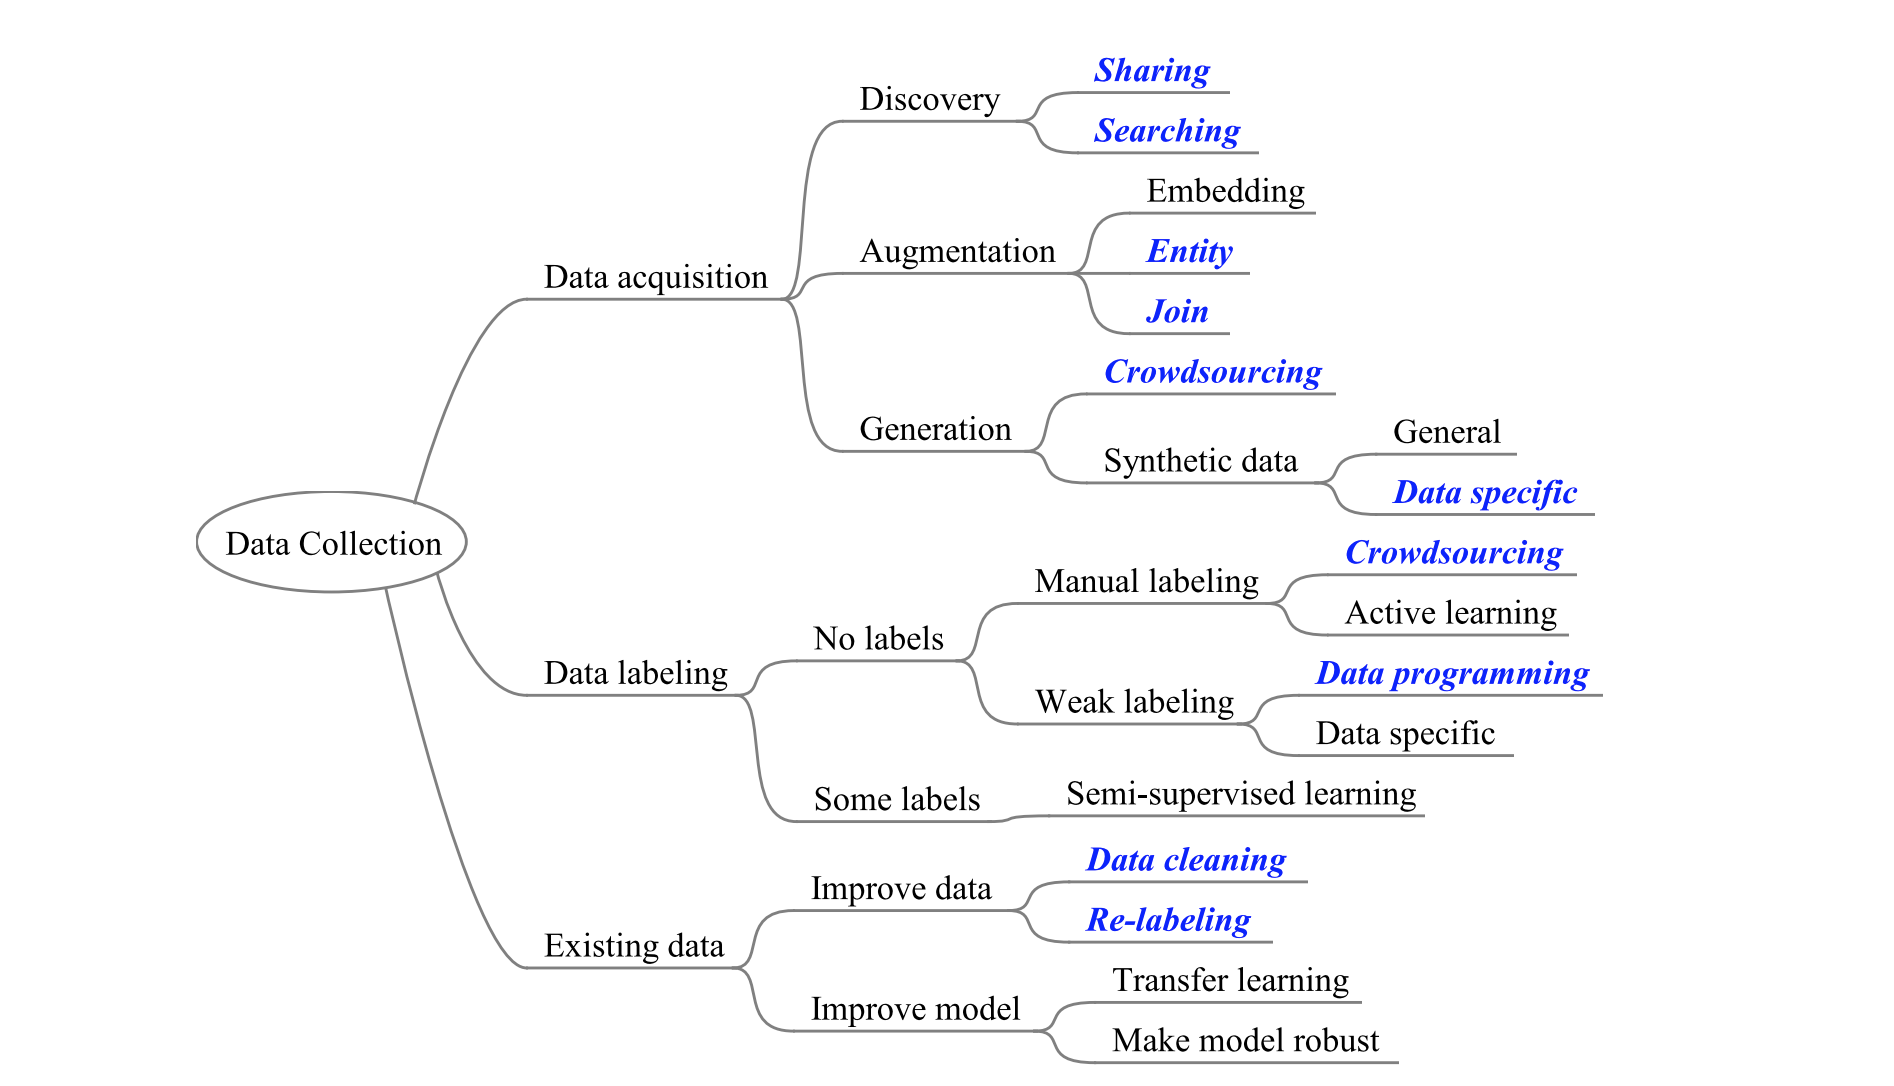

In [0]:
from IPython.display import Image
Image("images/1.png")

- If the goal is to share and search new datasets, then data acquisition techniques can be used to discover, augment, or generate datasets. 
- Cnce the datasets are available, various data labeling techniques can be used to label the individual examples. 
- Instead of labeling new datasets, it may be better to improve existing data or train on top of trained models using transfer learning techniques. 
- These three methods are not necessarily distinct and can be used together. For example, one could search and label more datasets while improving existing ones.
- Data collection techniques come not only from the machine learning community (including natural language processing and computer vision, which traditionally use machine learning heavily), but more recently also from the data management community. 
- The topics that are at least partially contributed by the data management community are highlighted using blue italic text (the above figure).
- As machine learning needs to be performed on large amounts of training data, data management issues including how to acquire large datasets, how to perform data labeling at scale, and how to improve the quality of large amounts of existing data become more relevant.

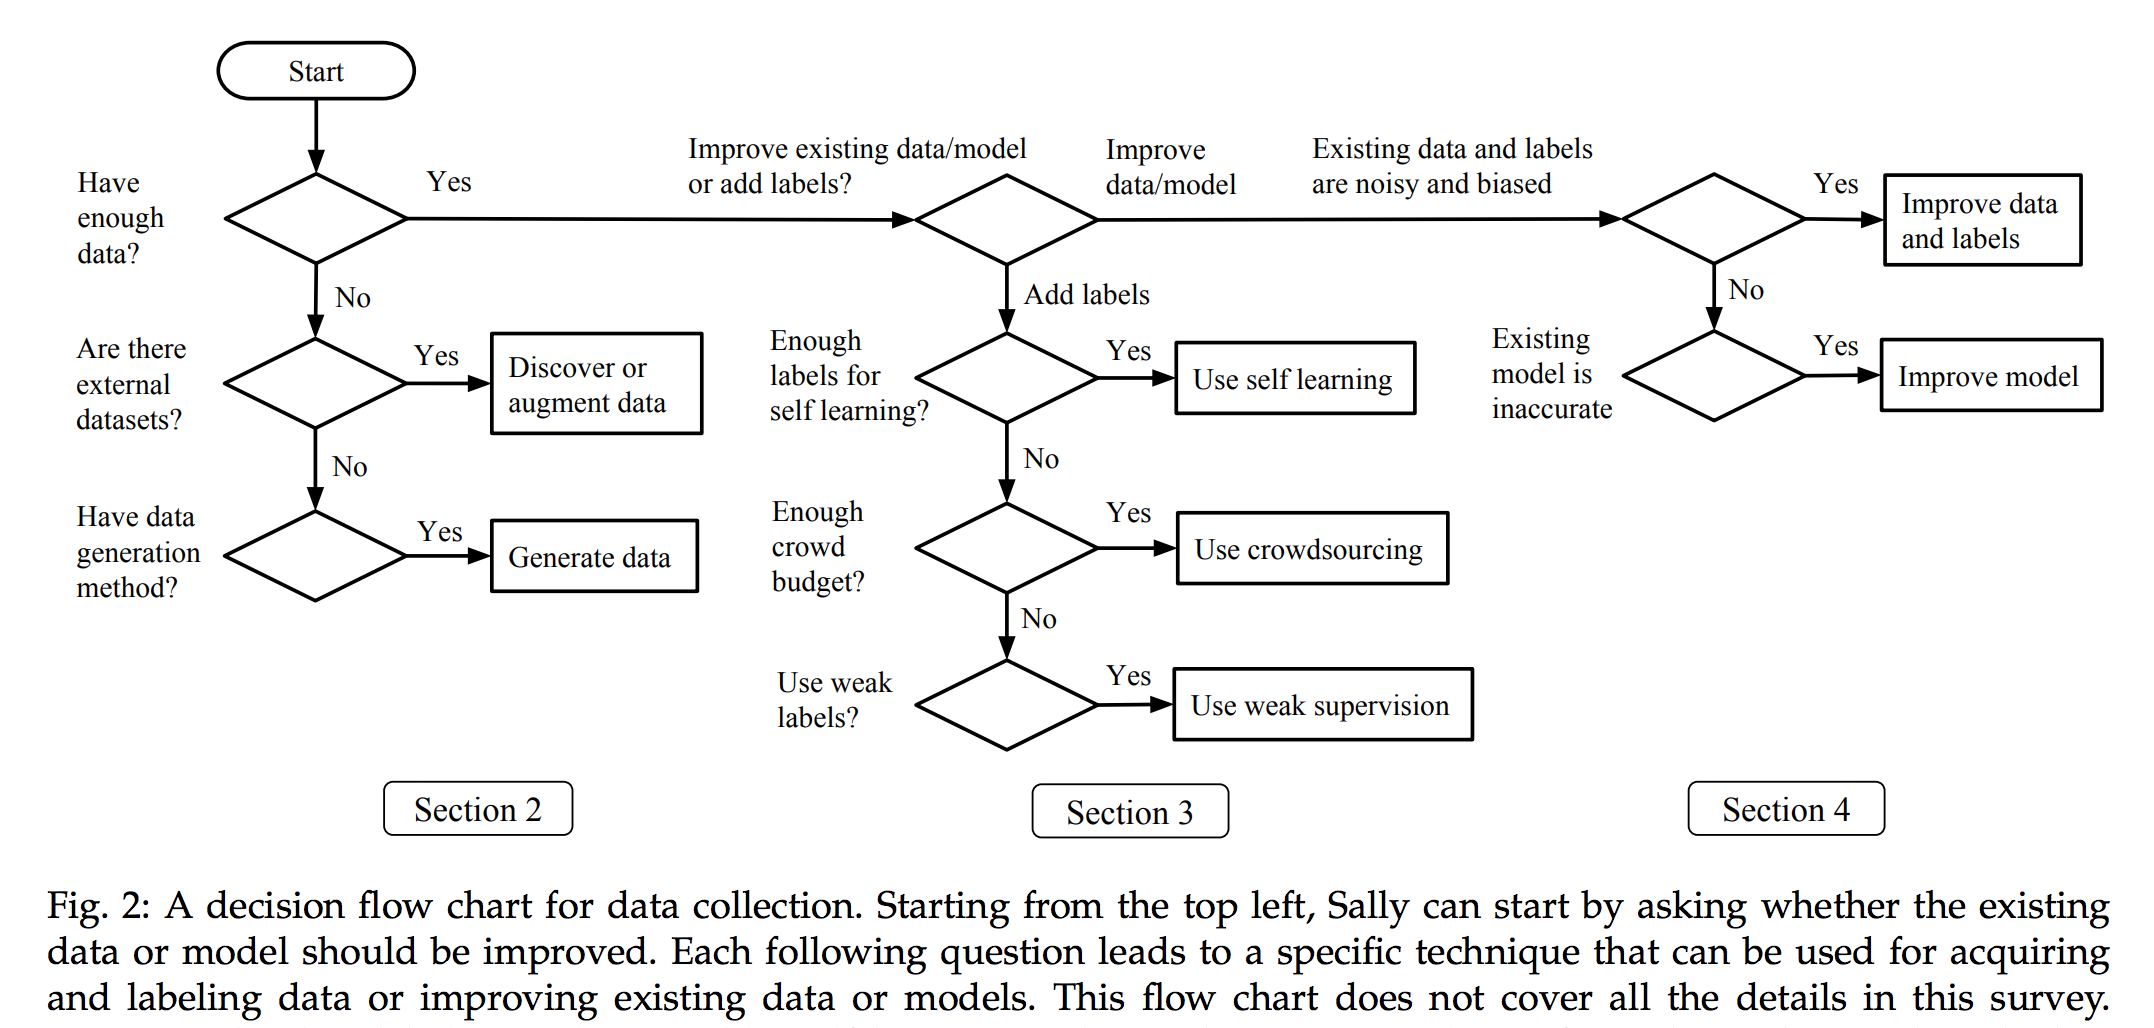

In [0]:
from IPython.display import Image
Image("images/2.png")

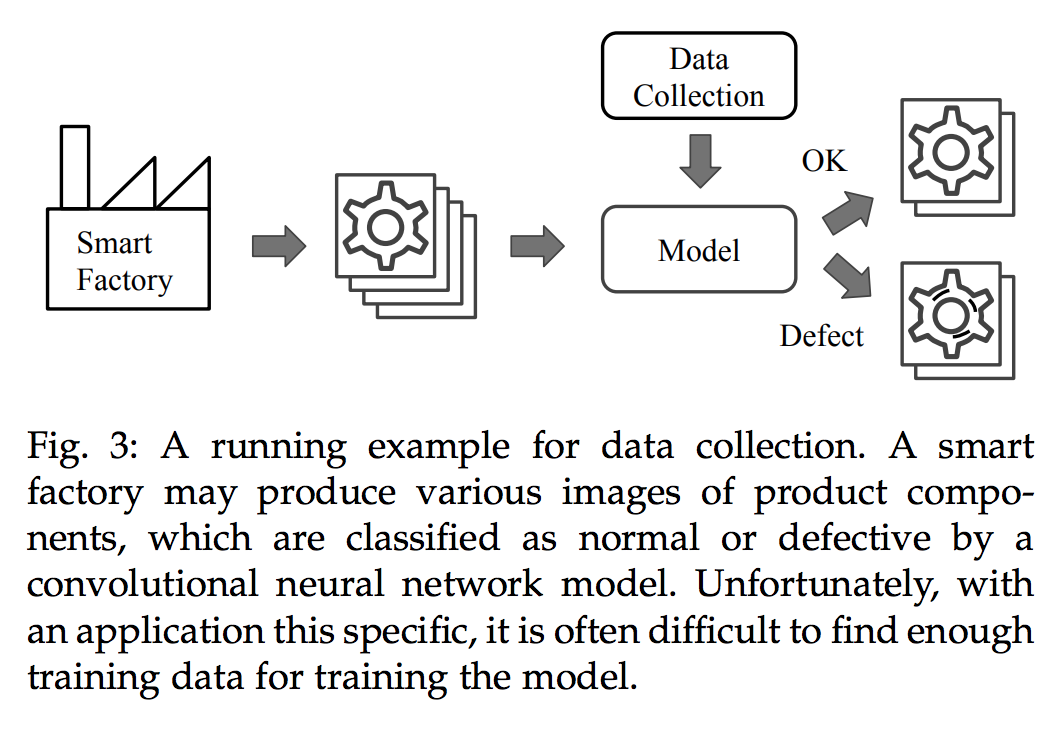

In [0]:
from IPython.display import Image
Image("images/3.png")

## 2. Google Landmark Recognition Challenge
Label famous (and not-so-famous) landmarks in images

https://www.kaggle.com/c/landmark-recognition-challenge

- This technology can predict landmark labels directly from image pixels, to help people better understand and organize their photo collections.

- A great obstacle to landmark recognition research is the lack of large annotated datasets. In this competition, we present the largest worldwide dataset to date (2018), to foster progress in this problem. This competition challenges Kagglers to build models that recognize the correct landmark (if any) in a dataset of challenging test images.

- Many Kagglers are familiar with image classification challenges like the ImageNet Large Scale Visual Recognition Challenge (ILSVRC), which aims to recognize 1K general object categories. Landmark recognition is a little different from that: it contains a much larger number of classes (there are a total of 15K classes in this challenge), and the number of training examples per class may not be very large. Landmark recognition is challenging in its own way.

https://youtu.be/1pnnPXULzk8



- Test images may depict no landmark, one landmark, or more than one landmark. 
- The training set images each depict exactly one landmark. Each image has a unique id (a hash) and each landmark has a unique id (an integer).

### Dataset construction

- The training set was constructed by clustering photos with respect to their geolocation and visual similarity using an algorithm similar to the one described in [1]. Matches between training images were established using local feature matching. Note that there may be multiple clusters per landmark, which typically correspond to different views or different parts of the landmark. To avoid bias, no computer vision algorithms were used for ground truth generation. Instead, we established ground truth correspondences between test images and landmarks using human annotators.
- pdf link

### Evaluation Metric (Homeworks)
- Global Average Precision (GAP)
- Mean Average Precision (MAP)

### EDA

https://www.kaggle.com/codename007/a-very-extensive-landmark-exploratory-analysis

## 3. Introduction to Inception

https://towardsdatascience.com/a-simple-guide-to-the-versions-of-the-inception-network-7fc52b863202

https://www.analyticsvidhya.com/blog/2018/10/understanding-inception-network-from-scratch/

https://medium.com/@sh.tsang/review-inception-v3-1st-runner-up-image-classification-in-ilsvrc-2015-17915421f77c

https://arxiv.org/pdf/1409.4842v1.pdf

## 4. Inception Implementation

## 5. Squeeze-and-Excitation Networks

https://arxiv.org/abs/1709.01507

http://image-net.org/challenges/talks_2017/SENet.pdf



# Reference

https://arxiv.org/pdf/1811.03402.pdf

https://landmarksworkshop.github.io/CVPRW2018/

https://www.kaggle.com/c/landmark-recognition-challenge

https://www.reddit.com/r/datasets/

https://medium.com/coinmonks/handling-imbalanced-datasets-predicting-credit-card-fraud-544f5e74e0fd

https://en.wikipedia.org/wiki/Evaluation_measures_(information_retrieval)#Mean_average_precision

https://towardsdatascience.com/a-simple-guide-to-the-versions-of-the-inception-network-7fc52b863202

https://towardsdatascience.com/squeeze-and-excitation-networks-9ef5e71eacd7

https://towardsdatascience.com/review-senet-squeeze-and-excitation-network-winner-of-ilsvrc-2017-image-classification-a887b98b2883

https://towardsdatascience.com/neural-networks-intuitions-2-dot-product-gram-matrix-and-neural-style-transfer-5d39653e7916

https://medium.com/@timothycarlen/understanding-the-map-evaluation-metric-for-object-detection-a07fe6962cf3

## Code: Inception

https://www.analyticsvidhya.com/blog/2018/10/understanding-inception-network-from-scratch/

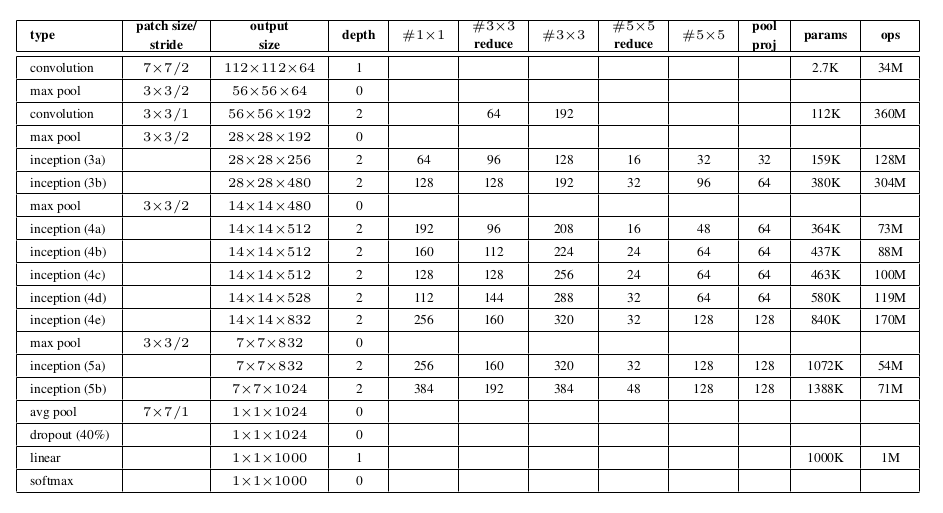

In [0]:
from IPython.display import Image
Image("images/inception.png")

In [0]:
import keras
from keras.layers.core import Layer
import keras.backend as K
import tensorflow as tf
from keras.datasets import cifar10

Using TensorFlow backend.
/anaconda3/envs/data-science/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/envs/data-science/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/envs/data-science/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/envs/data-science/lib/pytho

In [0]:
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D,  \
    Dropout, Dense, Input, concatenate,      \
    GlobalAveragePooling2D, AveragePooling2D,\
    Flatten

import cv2 
import numpy as np 
from keras.datasets import cifar10 
from keras import backend as K 
from keras.utils import np_utils

import math 
from keras.optimizers import SGD 
from keras.callbacks import LearningRateScheduler

In [0]:
(X_train, Y_train), (X_valid, Y_valid) = cifar10.load_data()

In [0]:
X_train.shape

(50000, 32, 32, 3)

In [0]:
Y_train.shape

(50000, 1)

In [0]:
X_valid.shape

(10000, 32, 32, 3)

In [0]:
Y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [0]:
# We will then load the dataset and perform some preprocessing steps. 
# This is a critical task before the deep learning model is trained.
num_classes = 10

def load_cifar10_data(img_rows, img_cols):

    # Load cifar10 training and validation sets
    (X_train, Y_train), (X_valid, Y_valid) = cifar10.load_data()
    
    print('loading ... done!')
    
    X_train = X_train[:5000,:,:,:]
    Y_train = Y_train[:5000]

    # Resize training images
    X_train = np.array([cv2.resize(img, (img_rows,img_cols)) for img in X_train[:,:,:,:]])
    X_valid = np.array([cv2.resize(img, (img_rows,img_cols)) for img in X_valid[:,:,:,:]])

    # Transform targets to keras compatible format
    Y_train = np_utils.to_categorical(Y_train, num_classes)
    Y_valid = np_utils.to_categorical(Y_valid, num_classes)
    
    X_train = X_train.astype('float32')
    X_valid = X_valid.astype('float32')

    # preprocess data
    X_train = X_train / 255.0
    X_valid = X_valid / 255.0

    return X_train, Y_train, X_valid, Y_valid

In [0]:
X_train, y_train, X_test, y_test = load_cifar10_data(224, 224)

loading ... done!


In [0]:
X_train.shape

(5000, 224, 224, 3)

In [0]:
y_train.shape

(5000, 10)

In [0]:
# Now, we will define our deep learning architecture. 
# We will quickly define a function to do this, which, when given the necessary information, 
# gives us back the entire inception layer.
def inception_module(x,
                     filters_1x1,
                     filters_3x3_reduce,
                     filters_3x3,
                     filters_5x5_reduce,
                     filters_5x5,
                     filters_pool_proj,
                     name=None):
    
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    
    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_3x3)

    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_5x5 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_5x5)

    pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(pool_proj)

    output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3, name=name)
    
    return output


In [0]:
kernel_init = keras.initializers.glorot_uniform()
bias_init = keras.initializers.Constant(value=0.2)

In [0]:
input_layer = Input(shape=(224, 224, 3))

x = Conv2D(64, (7, 7), padding='same', strides=(2, 2), activation='relu', name='conv_1_7x7/2', kernel_initializer=kernel_init, bias_initializer=bias_init)(input_layer)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_1_3x3/2')(x)
x = Conv2D(64, (1, 1), padding='same', strides=(1, 1), activation='relu', name='conv_2a_3x3/1')(x)
x = Conv2D(192, (3, 3), padding='same', strides=(1, 1), activation='relu', name='conv_2b_3x3/1')(x)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_2_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=64,
                     filters_3x3_reduce=96,
                     filters_3x3=128,
                     filters_5x5_reduce=16,
                     filters_5x5=32,
                     filters_pool_proj=32,
                     name='inception_3a')

x = inception_module(x,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=192,
                     filters_5x5_reduce=32,
                     filters_5x5=96,
                     filters_pool_proj=64,
                     name='inception_3b')

x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_3_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=192,
                     filters_3x3_reduce=96,
                     filters_3x3=208,
                     filters_5x5_reduce=16,
                     filters_5x5=48,
                     filters_pool_proj=64,
                     name='inception_4a')


x1 = AveragePooling2D((5, 5), strides=3)(x)
x1 = Conv2D(128, (1, 1), padding='same', activation='relu')(x1)
x1 = Flatten()(x1)
x1 = Dense(1024, activation='relu')(x1)
x1 = Dropout(0.7)(x1)
x1 = Dense(10, activation='softmax', name='auxilliary_output_1')(x1)

x = inception_module(x,
                     filters_1x1=160,
                     filters_3x3_reduce=112,
                     filters_3x3=224,
                     filters_5x5_reduce=24,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4b')

x = inception_module(x,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=256,
                     filters_5x5_reduce=24,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4c')

x = inception_module(x,
                     filters_1x1=112,
                     filters_3x3_reduce=144,
                     filters_3x3=288,
                     filters_5x5_reduce=32,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4d')


x2 = AveragePooling2D((5, 5), strides=3)(x)
x2 = Conv2D(128, (1, 1), padding='same', activation='relu')(x2)
x2 = Flatten()(x2)
x2 = Dense(1024, activation='relu')(x2)
x2 = Dropout(0.7)(x2)
x2 = Dense(10, activation='softmax', name='auxilliary_output_2')(x2)

x = inception_module(x,
                     filters_1x1=256,
                     filters_3x3_reduce=160,
                     filters_3x3=320,
                     filters_5x5_reduce=32,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_4e')

x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_4_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=256,
                     filters_3x3_reduce=160,
                     filters_3x3=320,
                     filters_5x5_reduce=32,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_5a')

x = inception_module(x,
                     filters_1x1=384,
                     filters_3x3_reduce=192,
                     filters_3x3=384,
                     filters_5x5_reduce=48,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_5b')

x = GlobalAveragePooling2D(name='avg_pool_5_3x3/1')(x)

x = Dropout(0.4)(x)

x = Dense(10, activation='softmax', name='output')(x)

W0817 22:03:41.757722 140735740625856 deprecation.py:506] From /anaconda3/envs/data-science/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model = Model(input_layer, [x, x1, x2], name='inception_v1')

In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv_1_7x7/2 (Conv2D)           (None, 112, 112, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
max_pool_1_3x3/2 (MaxPooling2D) (None, 56, 56, 64)   0           conv_1_7x7/2[0][0]               
__________________________________________________________________________________________________
conv_2a_3x3/1 (Conv2D)          (None, 56, 56, 64)   4160        max_pool_1_3x3/2[0][0]           
__________________________________________________________________________________________________
conv_2b_3x

In [0]:
epochs = 25
initial_lrate = 0.01

def decay(epoch, steps=100):
    initial_lrate = 0.01
    drop = 0.96
    epochs_drop = 8
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

sgd = SGD(lr=initial_lrate, momentum=0.9, nesterov=False)

lr_sc = LearningRateScheduler(decay, verbose=1)

model.compile(loss=['categorical_crossentropy', 'categorical_crossentropy', 'categorical_crossentropy'], loss_weights=[1, 0.3, 0.3], optimizer=sgd, metrics=['accuracy'])

In [0]:
history = model.fit(X_train, [y_train, y_train, y_train], validation_data=(X_test, [y_test, y_test, y_test]), epochs=epochs, batch_size=256, callbacks=[lr_sc])

Train on 5000 samples, validate on 10000 samples
Epoch 1/25

Epoch 00001: LearningRateScheduler setting learning rate to 0.01.
5000/5000 [==============================] - 1410s 282ms/step - loss: 3.8438 - output_loss: 2.4184 - auxilliary_output_1_loss: 2.3660 - auxilliary_output_2_loss: 2.3853 - output_acc: 0.0964 - auxilliary_output_1_acc: 0.1080 - auxilliary_output_2_acc: 0.1068 - val_loss: 3.7060 - val_output_loss: 2.3244 - val_auxilliary_output_1_loss: 2.3022 - val_auxilliary_output_2_loss: 2.3031 - val_output_acc: 0.1000 - val_auxilliary_output_1_acc: 0.1133 - val_auxilliary_output_2_acc: 0.1000
Epoch 2/25

Epoch 00002: LearningRateScheduler setting learning rate to 0.01.
5000/5000 [==============================] - 1254s 251ms/step - loss: 3.7361 - output_loss: 2.3523 - auxilliary_output_1_loss: 2.3053 - auxilliary_output_2_loss: 2.3073 - output_acc: 0.0994 - auxilliary_output_1_acc: 0.1050 - auxilliary_output_2_acc: 0.1016 - val_loss: 3.6976 - val_output_loss: 2.3171 - val_auxi